<a href="https://colab.research.google.com/github/suyangegrong/pdm08/blob/main/notebook/chap09_CNN_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(60000, 28, 28) (60000,)
[9 0 0 3 0 2 7 2 5 5]
Epoch 1/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4949 - accuracy: 0.8262 - val_loss: 0.4354 - val_accuracy: 0.8470
Epoch 2/25
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3718 - accuracy: 0.8648 - val_loss: 0.4022 - val_accuracy: 0.8578
Epoch 3/25
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3324 - accuracy: 0.8797 - val_loss: 0.3626 - val_accuracy: 0.8707
Epoch 4/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3105 - accuracy: 0.8870 - val_loss: 0.3515 - val_accuracy: 0.8747
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2923 - accuracy: 0.8917 - val_loss: 0.3460 - val_accuracy: 0.8784
Epoch 6/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2782 - accuracy: 0.8966 - val_loss: 0.3424 - val_accuracy: 0.8778
Epoch 7/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2674 - ac

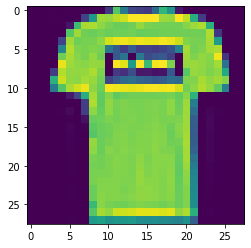

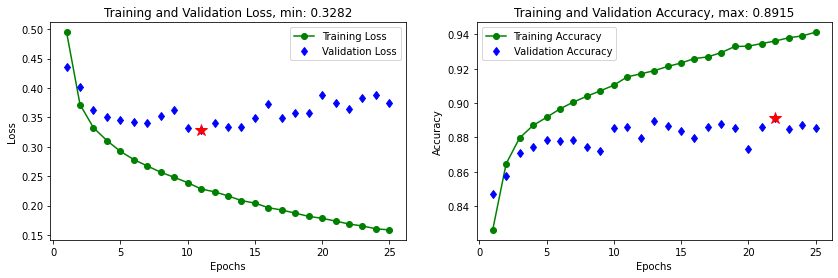

In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models #레이어, 모델 만들기 위해 import 

fashion_mnist = datasets.fashion_mnist 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#test train 데이터 로딩 

print(train_images.shape,train_labels.shape) #28x28,28,1 까지 4차원(그레이컬러)로 표시되어야 하지만 채널(1=디폴트)이므로 60000,28,28로 출력 
print(train_labels[:10])

plt.imshow(train_images[1])

train_images = train_images / 255.0 #최대 255인경우 정수를 .0=0.0 0.0~1.0까지 실수로 바꿔줌 정규화 
test_images = test_images / 255.0

#Model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28))) #MLP 와 DNN은 인풋 데이터를 1차원벡터로 받아들인다. = Flatten으로 차원 축소 
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) #output 레이어는 서로다른 구분하려는 레이어만큼 10개를 잡는다. 
#softmax = 10개의 1항목 중 1번항목 될 확률....2번...10번 의 확률을 전부 합쳐 1이되게 만들어 확률이 제일 높은곳을 택함. 

model.compile(optimizer='adam',         #모델을 학습시키는 조건 
              loss='sparse_categorical_crossentropy', #2개이상의 항목을 구분하기 위해 categorical을 쓰는데 그렇게 하기위해 train 레이블을 one hat인코딩을 해야한다.
              #원핫 인코딩을 했다면 categorical 사용 
              metrics=['accuracy']) #정확도 값을 계속 체크 

history = model.fit(train_images, train_labels, 
          epochs=25, #배치 사이즈 지정x => 디폴트 배치 사이즈를 사용한다. => 32 ==> 60000/32=1875 60000개의 데이터를 32개씩 넣어 1875묶음으로 만듬. 
          #1번째 배치 25번 학습 2번째......1875번째 배치 25번학습 
          validation_data=(test_images, test_labels), #validation 데이터로 위의 train이미지로 학습 시 정확도를 검증 =test데이터로 
          verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('정확도:', test_acc) #정확도 88 => mnist보다 데이터가 복잡하기에 정확도가 mnist보다 낮음 

#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

# 데이터 세트를 읽어들인다. 
train = pd.read_csv("train.csv", sep=',') #train.csv 파일 ,로 구분되어 있다. 
test = pd.read_csv("test.csv", sep=',')
train.shape,test.shape #train = 12개 특징 test = 11개 특징 
train.columns #Survived가 train에만 있다. 
test.columns

# 필요없는 컬럼을 삭제한다. 
train.drop(['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name',\
        'Cabin', 'PassengerId', 'Fare', 'Age'], inplace=True, axis=1) #inplace=True 9개 항목들을 완전히 삭제 
train.columns, train.shape #3개의 항목 
# 결손치가 있는 데이터 행은 삭제한다.

train.isna().sum() #3개항목 train에 isna = 데이터가 빠져있는지 확인 isNA ==> 0 0 0 없다. 
train.dropna(inplace=True) #만약에 NA이 있는 행은 모두 삭제해라. 
train.shape #재 확인 => 문제가 없다. 
train.head() #Survived(생존여부) Pclass(등급) Sex(성별) 
# 기호를 수치로 변환한다. 
for ix in train.index: #0~890까지 스캔하면서 남자면 1 여자면 0 <= 성별 mal female을 숫자로 바꿔주는 코드 
    if train.loc[ix, 'Sex']=="male":
       train.loc[ix, 'Sex']=1 
    else:
       train.loc[ix, 'Sex']=0 
train.head() #확인 

# 2차원 배열을 1차원 배열로 평탄화한다. 
target = np.ravel(train.Survived) #train에서 survived를 뽑아 891개에서 1개의 레이블, 타겟을 만들어줌. 
target.shape
target[:5]

# 생존여부를 학습 데이터에서 삭제한다. 
train.drop(['Survived'], inplace=True, axis=1) #Survived의 한 열을 모두 버린다. 
train.shape
train.head()
train = train.astype(float)     # 최근 소스에서는 float형태로 형변환하여야 
train.head() #정수에서 실수로 변경 확인 

# 케라스 모델을 생성한다. 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(2,))) #2개의 항목 성별,등급 총 2개의 값을 넣기에 (2,) 
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) #0과 1로 변환해주는게 sigmoid이므로 죽었는가 살았는가.. 남자인가 여자인가를 구분하기에 적당

# 케라스 모델을 컴파일한다. 
model.compile(loss='binary_crossentropy',#2가지 구분 = 바이너리 크로스 
              optimizer='adam', 
              metrics=['accuracy'])
# 케라스 모델을 학습시킨다. 
model.fit(train, target, epochs=30, batch_size=1, verbose=1) #왜 validication 데이터를 지정하지 않았는가? => 레이블이 없으므로
#1~891 까지 계산 X30회 
# DIY
######################################
# 훈련시킨 모델을 테스트 데이터에 적용 : 생사 예측
######################################



Epoch 1/30
891/891 [==============================] - 2s 2ms/step - loss: 0.5792 - accuracy: 0.7037
Epoch 2/30
891/891 [==============================] - 2s 2ms/step - loss: 0.5119 - accuracy: 0.7868
Epoch 3/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4936 - accuracy: 0.7856
Epoch 4/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4857 - accuracy: 0.7868
Epoch 5/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4769 - accuracy: 0.7834
Epoch 6/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4722 - accuracy: 0.7834
Epoch 7/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4712 - accuracy: 0.7823
Epoch 8/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4656 - accuracy: 0.7879
Epoch 9/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4643 - accuracy: 0.7879
Epoch 10/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4624 - accuracy: 0.7767

#test 

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov  2 14:05:34 2022

@author: 박희주
"""

import numpy as np
import pandas as pd
import tensorflow as tf

# 데이터 세트를 읽어들인다. 
train = pd.read_csv("train.csv", sep=',')
test = pd.read_csv("test.csv", sep=',')
# print(train.shape)
train.head()
# 필요없는 컬럼을 삭제한다. 
train.drop(['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name',\
        'Cabin', 'PassengerId', 'Fare', 'Age'], inplace=True, axis=1)
# print(train.shape)
train.head()
train.isna().sum()
train.duplicated().sum()
# 결손치가 있는 데이터 행은 삭제한다. 
train.dropna(inplace=True)

# 기호를 수치로 변환한다. 
for ix in train.index:
    if train.loc[ix, 'Sex']=="male":
       train.loc[ix, 'Sex']=1 
    else:
       train.loc[ix, 'Sex']=0 

# 2차원 배열을 1차원 배열로 평탄화한다. 
target = np.ravel(train.Survived) 

# 생존여부를 학습 데이터에서 삭제한다. 
train.drop(['Survived'], inplace=True, axis=1)
train = train.astype(float)     # 최근 소스에서는 float형태로 형변환하여야 

# 케라스 모델을 생성한다. 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# 케라스 모델을 컴파일한다. 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# 케라스 모델을 학습시킨다. 
model.fit(train, target, epochs=30, batch_size=1, verbose=1)

######################################
# 훈련시킨 모델을 테스트 데이터에 적용 : 생사 예측
######################################
# test model
# 필요없는 컬럼을 삭제한다. 
test.drop(['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name',\
        'Cabin', 'PassengerId', 'Fare', 'Age'], inplace=True, axis=1) #train데이터와 똑같이 맞춘다. 

test.isna().sum() #test 데이터에 빠진 부분이 있는지 => 없다. 

# 결손치가 있는 데이터 행은 삭제한다. 
test.dropna(inplace=True)

# 기호를 수치로 변환한다. 
for ix in test.index:
    if test.loc[ix, 'Sex']=="male":
       test.loc[ix, 'Sex']=1 
    else:
       test.loc[ix, 'Sex']=0 

# 2차원 배열을 1차원 배열로 평탄화한다. 
# target_test = np.ravel(test.Survived) 
# 생존여부를 학습 데이터에서 삭제한다. 
# test.drop(['Survived'], inplace=True, axis=1)
test = test.astype(float)     
test.shape   # (418,2)
# 학습된 model을 이용해서 tset 데이터에 대한 생존 예측
pred_test = model.predict(test, batch_size=1) #418명에 대해 1번째 사람의 생존확률 = 0.0~1.0까지 실수로 둘어감 ... 418번째 사람
# Survival
print(np.where(pred_test >= 0.5)[0].size)  # 152
# Dead
print(np.where(pred_test < 0.5)[0].size)   # 266


Epoch 1/30
891/891 [==============================] - 2s 2ms/step - loss: 0.5536 - accuracy: 0.7340
Epoch 2/30
891/891 [==============================] - 2s 2ms/step - loss: 0.5165 - accuracy: 0.7845
Epoch 3/30
891/891 [==============================] - 2s 2ms/step - loss: 0.5017 - accuracy: 0.7811
Epoch 4/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4915 - accuracy: 0.7935
Epoch 5/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4885 - accuracy: 0.7856
Epoch 6/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4856 - accuracy: 0.7868
Epoch 7/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4813 - accuracy: 0.7856
Epoch 8/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4754 - accuracy: 0.7856
Epoch 9/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4711 - accuracy: 0.7912
Epoch 10/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4764 - accuracy: 0.7879

# CNN 
- Conv2D 
- MaxPooling2D

## mnist model 

In [ ]:
# Conv2D & MaxPooling2D
import tensorflow as tf
from tensorflow.keras import layers

# padding = 'valid'
input_shape = (4, 28, 28, 3) #배치사이즈(이미지 갯수) , 28x28이미지, RGB컬러(채널, 1=GRAY) 
x = tf.random.normal(input_shape) #INPUT 데이터를 무작위 배열로 만듬 
y = layers.Conv2D(2, 3, activation='relu', input_shape=input_shape[1:])(x) #컨벌루션 담당 뉴런의 갯수(2개=필터갯수),필터의 구조(3=>3X3),
input_shape[1:]  #28x28x3 ==> 3차원, 위의 4는 4개라는 것이고 개별의 shape는 3차원 / input으로 받아들임. 
print(y.shape) # 4,26,26,2 => 4개 이미지, 26x26이미지(28x28을 3x3필터로 컨벌루션 시 나머지 2개가 남아서 26개), 1번째 컨벌루션 layer의 필터의 수(2개)
#2개의 필터로 스캔했기 때문에. 

# padding = 'same'
x = tf.random.normal(input_shape) 
y = layers.Conv2D(2, 3, activation='relu', input_shape=input_shape[1:],padding='same')(x) 
input_shape[1:]  
print(y.shape) # 4,28,28,2 => 제로패딩에 의해 크기의 변화가 없다 

# number of filters = 32 
x = tf.random.normal(input_shape) 
y = layers.Conv2D(32, 3, activation='relu', input_shape=input_shape[1:],padding='same')(x) 
input_shape[1:]  
print(y.shape) # 4,28,28,32 => 컨벌루션의 필터 갯수가 32개 

# Input data = 100개, 64x64 | filter = 128개, 5x5
input_shape = (100, 64, 64, 3) #64X64 RGB컬러 영상이 100장 
x = tf.random.normal(input_shape)
y = layers.Conv2D(128, 5, activation='relu', padding="same",  #128개 필터(5X5))
			input_shape=input_shape[1:])(x)
print(y.shape)

# Pooling
x = tf.constant([[1., 2., 3.],     [4., 5., 6.],     [7., 8., 9.]]) #3x3 
x = tf.reshape(x, [1, 3, 3, 1]) #input데이터 1개 3x3이미지, 채널은 1(gray) 
max_pool_2d = layers.MaxPooling2D(pool_size=(2, 2), #fliter = 2x2 
                                           strides=(1, 1), padding='valid') #가로1 세로1씩 이동하여 스캔, 출력이미지 크기 줄어듬,  
print(max_pool_2d(x)) #3x3에서 2x2 풀링을 스캔하여 4개의 값중 가장 큰값(특징)만 뽑아냄 

# padding = 'same' 
x = tf.constant([[1., 2., 3.],     [4., 5., 6.],     [7., 8., 9.]]) #3x3 
x = tf.reshape(x, [1, 3, 3, 1]) #input데이터 1개 3x3이미지, 채널은 1(gray) 
max_pool_2d = layers.MaxPooling2D(pool_size=(2, 2), #fliter = 2x2 
                                           strides=(1, 1), padding='same') #가로1 세로1씩 이동하여 스캔, 출력이미지 크기 줄어듬,  
print(max_pool_2d(x)) #3x3 입력 영상의 외곽을 0으로 채워 똑같이 함. 

(4, 26, 26, 2)
(4, 28, 28, 2)
(4, 28, 28, 32)
(100, 64, 64, 128)
tf.Tensor(
[[[[5.]
   [6.]]

  [[8.]
   [9.]]]], shape=(1, 2, 2, 1), dtype=float32)
tf.Tensor(
[[[[5.]
   [6.]
   [6.]]

  [[8.]
   [9.]
   [9.]]

  [[8.]
   [9.]
   [9.]]]], shape=(1, 3, 3, 1), dtype=float32)


# CNN -Mnit

In [ ]:
# import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

print(train_images.shape, train_labels.shape)
# 픽셀 값을 0~1 사이로 정규화한다. 
train_images, test_images = train_images / 255.0, test_images / 255.0

(60000, 28, 28, 1) (60000,)


In [ ]:
#Model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

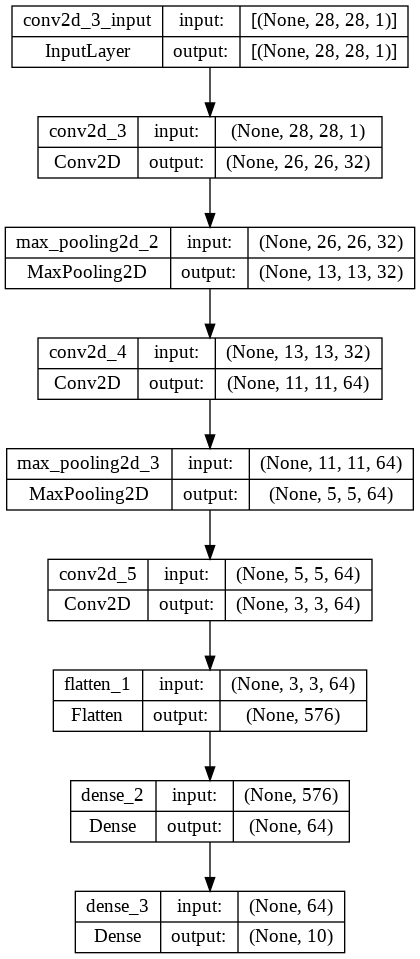

In [ ]:
model.summary()
keras.utils.plot_model(model, show_shapes=True)

## [DIY] test 데이터에 모델 적용하고 정확도 계산

In [ ]:
model.fit(train_images, train_labels, epochs=5)
model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 14s 3ms/step - loss: 0.1462 - accuracy: 0.9552
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0467 - accuracy: 0.9858
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0313 - accuracy: 0.9898
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0245 - accuracy: 0.9922
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0308 - accuracy: 0.9908


[0.030845418572425842, 0.9908000230789185]